In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from mglearn.plots import plot_2d_separator
from mlxtend.plotting import plot_decision_regions

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

X=wine.data
y=wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.112)

In [3]:
# linear svm
valid_score = []
test_score= []
c_values = [0.01, 0.1, 1] # 사용해볼 C 값들
for c in c_values:
    linearsvc= SVC(kernel='linear', C=c)
    
    linearsvc.fit(X_subtrain, y_subtrain)
    valid_score.append(linearsvc.score(X_val, y_val))
    
    linearsvc.fit(X_train, y_train)
    test_score.append(linearsvc.score(X_test, y_test))

In [4]:
# rbf kernel SVM classifier
valid_score2 = []
test_score2= []
gammas = [0.001, 0.0001, 0.01, 0.1, 1] # 사용해볼 gamma 값들
for gamma in gammas:
    rbfsvc= SVC(kernel='rbf', gamma=gamma, C= 1)
    rbfsvc.fit(X_subtrain, y_subtrain)
    valid_score2.append(rbfsvc.score(X_val, y_val))
    
    rbfsvc.fit(X_train, y_train)
    test_score2.append(rbfsvc.score(X_test, y_test))

In [5]:
# poly kernel SVM classifier
valid_score3 = []
test_score3= []
gammas = [0.001, 0.0001, 0.01, 0.1, 1] # 사용해볼 gamma 값들
for gamma in gammas:
    polysvc= SVC(kernel='poly', gamma=gamma, C= 1)
    polysvc.fit(X_subtrain, y_subtrain)
    valid_score3.append(polysvc.score(X_val, y_val))
    
    polysvc.fit(X_train, y_train)
    test_score3.append(polysvc.score(X_test, y_test))

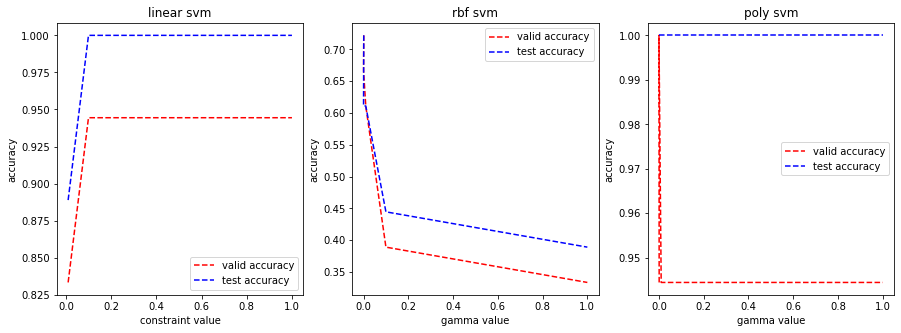

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("linear svm")
plt.xlabel("constraint value")
plt.ylabel("accuracy")
plt.plot(c_values, valid_score, c='r', label='valid accuracy', ls='--')
plt.plot(c_values, test_score, c='b', label='test accuracy', ls='--')
plt.legend()

plt.subplot(132)
plt.title("rbf svm")
plt.xlabel("gamma value")
plt.ylabel("accuracy")
plt.plot(gammas, valid_score2, c='r', label='valid accuracy', ls='--')
plt.plot(gammas, test_score2, c='b', label='test accuracy', ls='--')
plt.legend()

plt.subplot(133)
plt.title("poly svm")
plt.xlabel("gamma value")
plt.ylabel("accuracy")
plt.plot(gammas, valid_score3, c='r', label='valid accuracy', ls='--')
plt.plot(gammas, test_score3, c='b', label='test accuracy', ls='--')
plt.legend()
plt.show()

In [7]:
##########################

In [8]:
# 각 알고리즘의 분류성능을 확인하기 위해
# decision tree에서 구했던 feature 중요도를 기반으로
# wine data에서 중요도가 높았던 두 feature를 뽑아 새로운 데이터로 사용
# 뽑은 feature는 proline과 flavanoids

X= wine.data[:, [6, 12]]
y= wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning

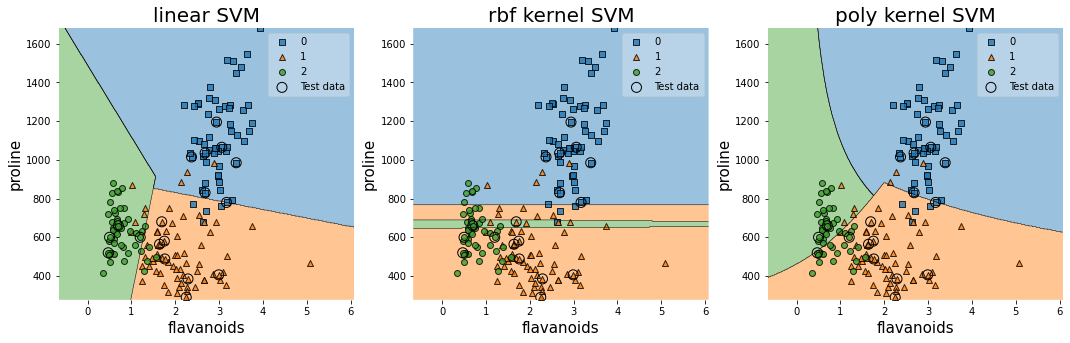

In [9]:
linearscv = SVC(kernel='linear', decision_function_shape='ovo', C=0.1)
linearscv.fit(X_train, y_train)
y_pred_linear=linearscv.predict(X_test)

rbfscv = SVC(kernel='rbf', gamma=0.0001, C=0.1)
rbfscv.fit(X_train, y_train)
y_pred_rbf=rbfscv.predict(X_test)

polyscv = SVC(kernel='poly', gamma=0.0001, C=0.1)
polyscv.fit(X_train, y_train)
y_pred_poly=polyscv.predict(X_test)

scatter_highlight_kwargs = {'label': 'Test data', 
                            'alpha': 1.0,
                           's': 100}

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.title("linear SVM", size= 20)
plt.xlabel('flavanoids', size= 15)
plt.ylabel('proline', size= 15)
plot_decision_regions(X, y, clf=linearscv, 
                      X_highlight=X_test,
                     scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.subplot(132)
plt.title("rbf kernel SVM", size= 20)
plt.xlabel('flavanoids', size= 15)
plt.ylabel('proline', size= 15)
plot_decision_regions(X, y, clf=rbfscv, 
                      X_highlight=X_test, 
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.subplot(133)
plt.title("poly kernel SVM", size= 20)
plt.xlabel('flavanoids', size= 15)
plt.ylabel('proline', size= 15)
plot_decision_regions(X, y, clf=polyscv, 
                      X_highlight=X_test,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.show()

In [10]:
print("************************linear************************")
print(classification_report(y_test,y_pred_linear))
print("*************************rbf**************************")
print(classification_report(y_test,y_pred_rbf))
print("*************************poly*************************")
print(classification_report(y_test,y_pred_poly))

************************linear************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

*************************rbf**************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.67      0.86      0.75         7
           2       0.50      0.25      0.33         4

    accuracy                           0.78        18
   macro avg       0.72      0.70      0.69        18
weighted avg       0.76      0.78      0.75        18

*************************poly*************************
              precision    recall  f1-score   support

           0      